In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px

import calmap

# Primary Colors
colour_primary_black = '#000000'
colour_primary_purple = '#800080'

# Gradient Shades
colour_gradient_dark_purple = '#400040'
colour_gradient_medium_purple = '#600060'
colour_gradient_light_purple = '#A000A0'

# Accent Colors
colour_accent_lavender = '#E6E6FA'
colour_accent_deep_purple = '#4B0082'
colour_accent_soft_black = '#333333'

# Complementary Colors
colour_complementary_mint_green = '#98FF98'
colour_complementary_soft_pink = '#FFB6C1'

# Text
colour_off_white = '#b4abb8'

plt.rcParams['axes.titlecolor'] = colour_off_white
plt.rcParams['axes.labelcolor'] = colour_off_white
plt.rcParams['xtick.color'] = colour_off_white
plt.rcParams['ytick.color'] =colour_off_white 
plt.rcParams['ytick.color'] = colour_off_white
plt.rcParams['ytick.color'] = colour_off_white
plt.rcParams['text.color'] = colour_off_white
plt.rcParams['legend.edgecolor'] = colour_primary_black

#background colour
plt.rcParams['axes.facecolor'] =colour_primary_black 
plt.rcParams['figure.facecolor'] = colour_primary_black

#colour palette for heat maps
color_palette = sns.color_palette(palette = f'blend:{colour_primary_black},{colour_gradient_medium_purple}',as_cmap=True)

In [ ]:
CA_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/CAvideos.csv')

#filling in empty spaces in the description column
CA_videos['description'] = CA_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)

##converting dates and times and creating a new column for publish time
CA_videos['publish_date'] = pd.to_datetime(CA_videos['publish_time'].str[0:10])
CA_videos['publish_time'] = pd.to_datetime(CA_videos['publish_time'].str[11:19], format='%H:%M:%S')
CA_videos['trending_date'] = pd.to_datetime(CA_videos['trending_date'],format='%y.%d.%m')

##creating new column which has the time until the video begins to trend
CA_videos['days_til_trend']= ((CA_videos['trending_date'] - CA_videos['publish_date']).astype(int))/86400000000000


DE_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/DEvideos.csv')
DE_videos['description'] = DE_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
DE_videos['publish_date'] = pd.to_datetime(DE_videos['publish_time'].str[0:10])
DE_videos['publish_time'] = pd.to_datetime(DE_videos['publish_time'].str[11:19], format='%H:%M:%S')
DE_videos['trending_date'] = pd.to_datetime(DE_videos['trending_date'],format='%y.%d.%m')
DE_videos['days_til_trend']= ((DE_videos['trending_date'] - DE_videos['publish_date']).astype(int))/86400000000000


FR_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/FRvideos.csv')
FR_videos['description'] = FR_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
FR_videos['publish_date'] = pd.to_datetime(FR_videos['publish_time'].str[0:10])
FR_videos['publish_time'] = pd.to_datetime(FR_videos['publish_time'].str[11:19], format='%H:%M:%S')
FR_videos['trending_date'] = pd.to_datetime(FR_videos['trending_date'],format='%y.%d.%m')
FR_videos['days_til_trend']= ((FR_videos['trending_date'] - FR_videos['publish_date']).astype(int))/86400000000000

GB_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/GBvideos.csv')
GB_videos['description'] = GB_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
GB_videos['publish_date'] = pd.to_datetime(GB_videos['publish_time'].str[0:10])
GB_videos['publish_time'] = pd.to_datetime(GB_videos['publish_time'].str[11:19], format='%H:%M:%S')
GB_videos['trending_date'] = pd.to_datetime(GB_videos['trending_date'],format='%y.%d.%m')
GB_videos['days_til_trend']= ((GB_videos['trending_date'] - GB_videos['publish_date']).astype(int))/86400000000000


IN_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/INvideos.csv')
IN_videos['description'] = IN_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
IN_videos['publish_date'] = pd.to_datetime(IN_videos['publish_time'].str[0:10])
IN_videos['publish_time'] = pd.to_datetime(IN_videos['publish_time'].str[11:19], format='%H:%M:%S')
IN_videos['trending_date'] = pd.to_datetime(IN_videos['trending_date'],format='%y.%d.%m')
IN_videos['days_til_trend']= ((IN_videos['trending_date'] - IN_videos['publish_date']).astype(int))/86400000000000


US_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/USvideos.csv')
US_videos['description'] = US_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
US_videos['publish_date'] = pd.to_datetime(US_videos['publish_time'].str[0:10])
US_videos['publish_time'] = pd.to_datetime(US_videos['publish_time'].str[11:19], format='%H:%M:%S')
US_videos['trending_date'] = pd.to_datetime(US_videos['trending_date'],format='%y.%d.%m')
US_videos['days_til_trend']= ((US_videos['trending_date'] - US_videos['publish_date']).astype(int))/86400000000000


JP_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/JPvideos.csv', encoding="ISO-8859-1")
JP_videos['description'] = JP_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
JP_videos['publish_date'] = pd.to_datetime(JP_videos['publish_time'].str[0:10])
JP_videos['publish_time'] = pd.to_datetime(JP_videos['publish_time'].str[11:19], format='%H:%M:%S')
JP_videos['trending_date'] = pd.to_datetime(JP_videos['trending_date'],format='%y.%d.%m')
JP_videos['days_til_trend']= ((JP_videos['trending_date'] - JP_videos['publish_date']).astype(int))/86400000000000


KR_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/KRvideos.csv', encoding="ISO-8859-1")
KR_videos['description'] = KR_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
KR_videos['publish_date'] = pd.to_datetime(KR_videos['publish_time'].str[0:10])
KR_videos['publish_time'] = pd.to_datetime(KR_videos['publish_time'].str[11:19], format='%H:%M:%S')
KR_videos['trending_date'] = pd.to_datetime(KR_videos['trending_date'],format='%y.%d.%m')
KR_videos['days_til_trend']= ((KR_videos['trending_date'] - KR_videos['publish_date']).astype(int))/86400000000000


MX_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/MXvideos.csv', encoding="ISO-8859-1")
MX_videos['description'] = MX_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
MX_videos['publish_date'] = pd.to_datetime(MX_videos['publish_time'].str[0:10])
MX_videos['publish_time'] = pd.to_datetime(MX_videos['publish_time'].str[11:19], format='%H:%M:%S')
MX_videos['trending_date'] = pd.to_datetime(MX_videos['trending_date'],format='%y.%d.%m')
MX_videos['days_til_trend']= ((MX_videos['trending_date'] - MX_videos['publish_date']).astype(int))/86400000000000


RU_videos = pd.read_csv('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/RUvideos.csv', encoding="ISO-8859-1")
RU_videos['description'] = RU_videos['description'].apply(lambda x: '' if pd.isnull(x)  else x)
RU_videos['publish_date'] = pd.to_datetime(RU_videos['publish_time'].str[0:10])
RU_videos['publish_time'] = pd.to_datetime(RU_videos['publish_time'].str[11:19], format='%H:%M:%S')
RU_videos['trending_date'] = pd.to_datetime(RU_videos['trending_date'],format='%y.%d.%m')
RU_videos['days_til_trend']= ((RU_videos['trending_date'] - RU_videos['publish_date']).astype(int))/86400000000000

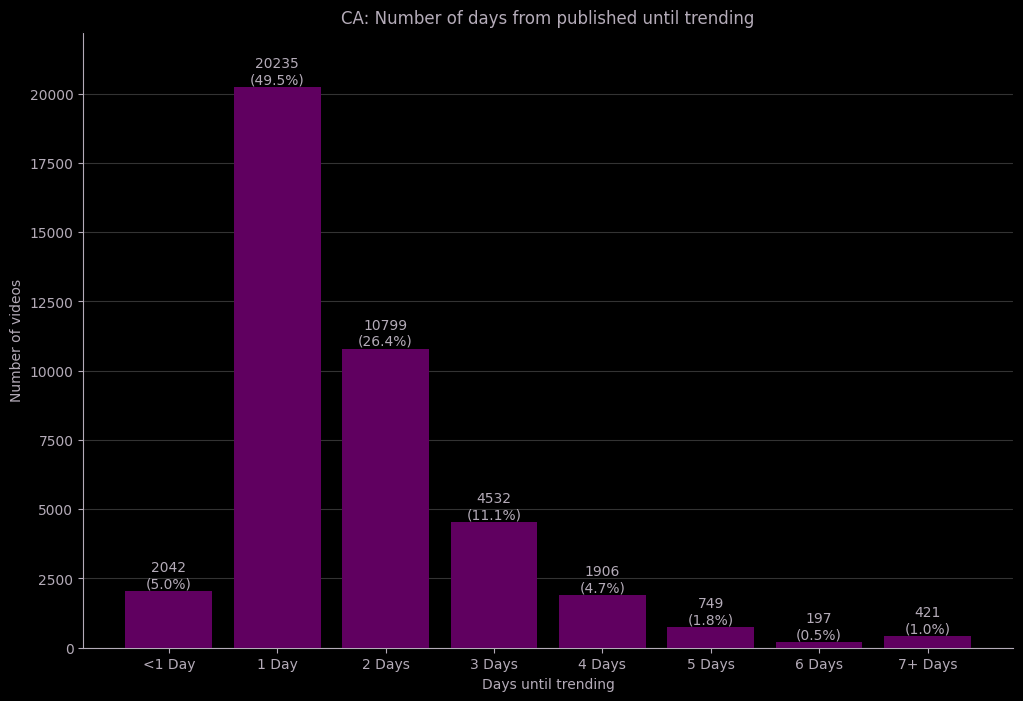

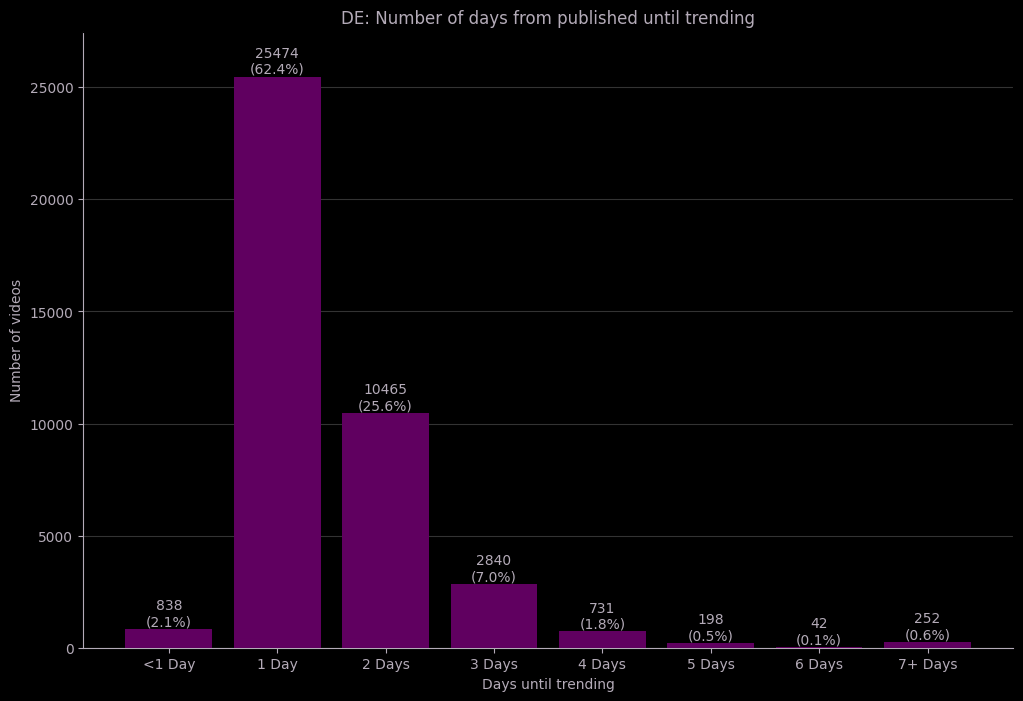

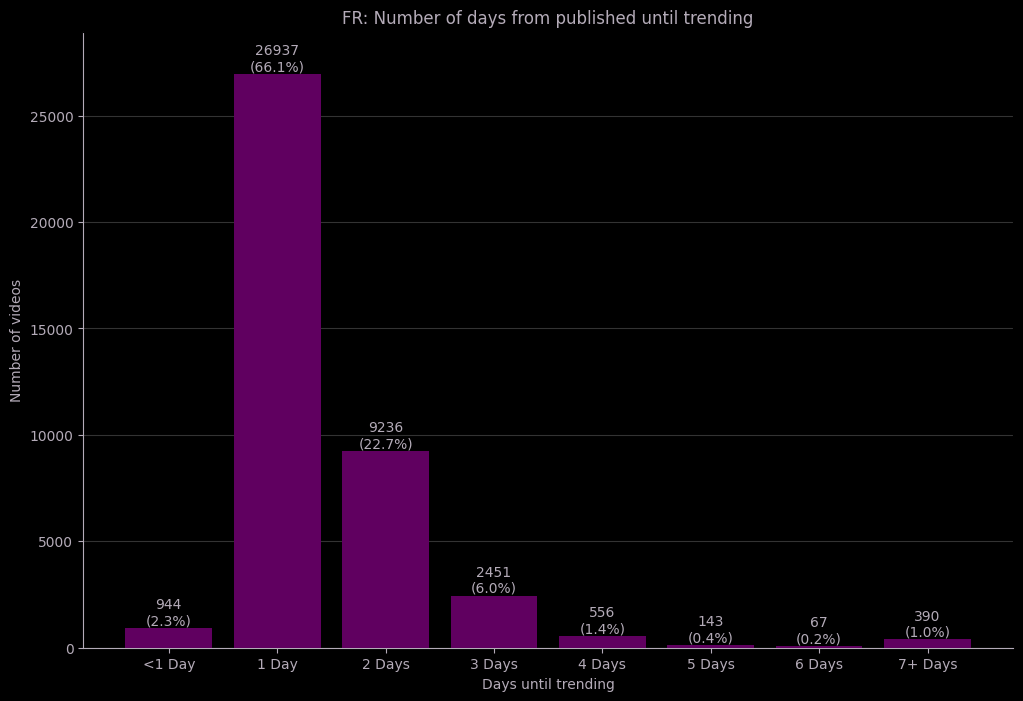

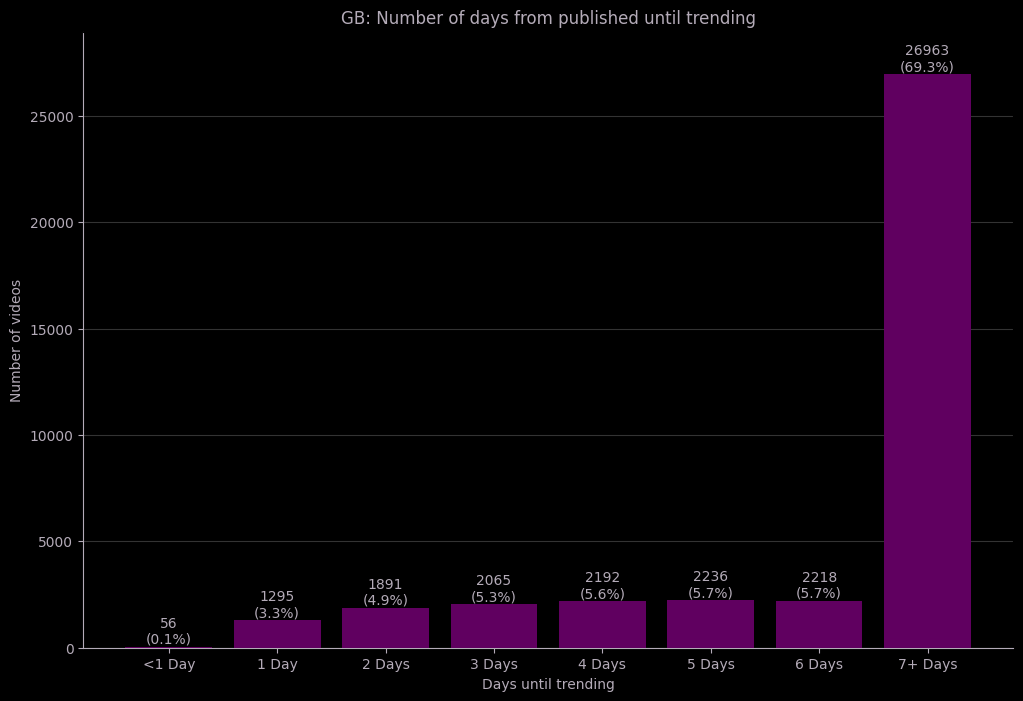

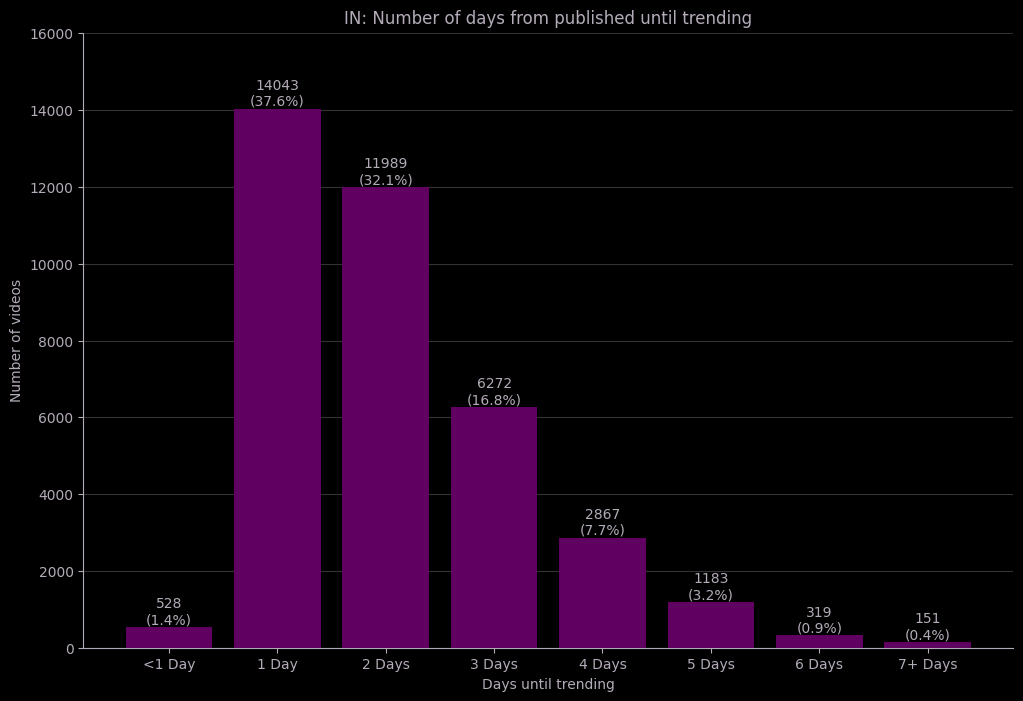

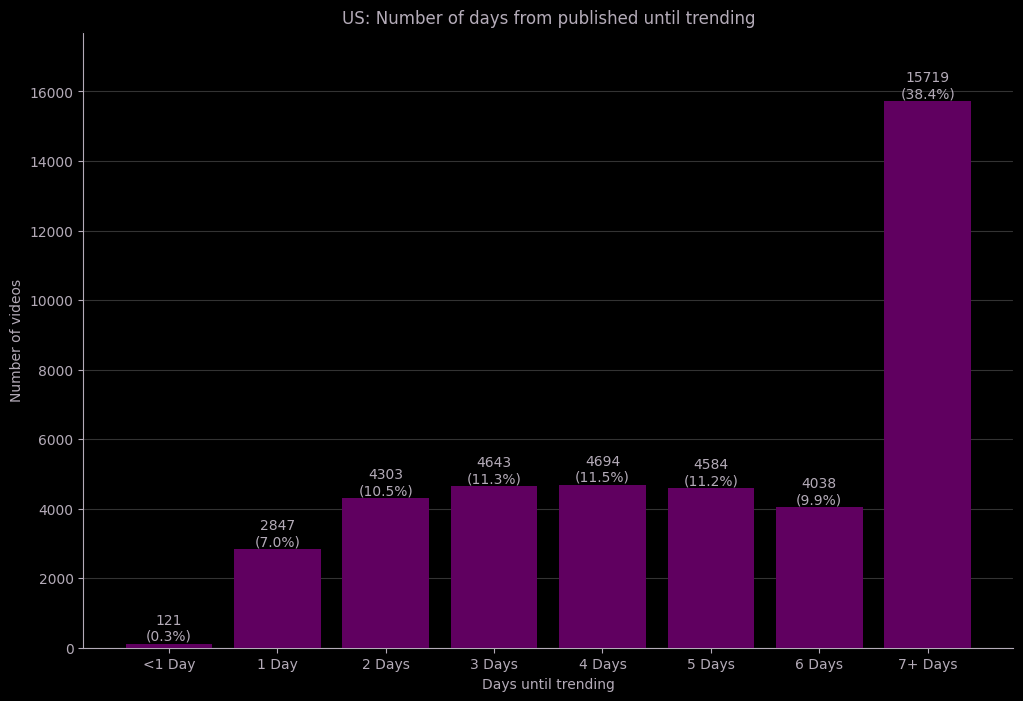

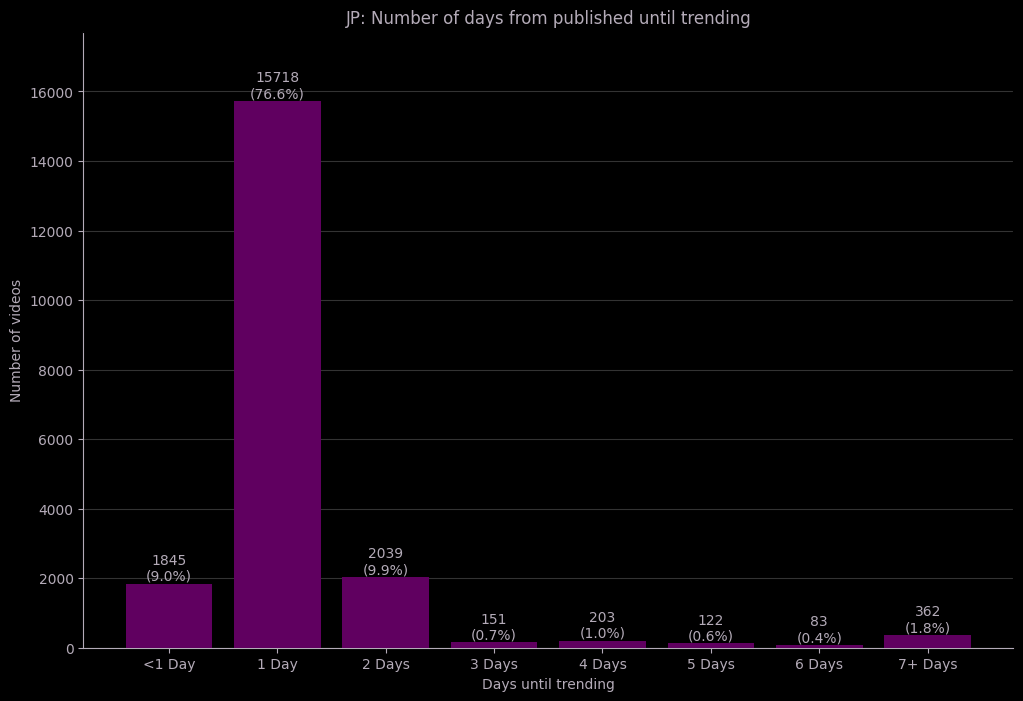

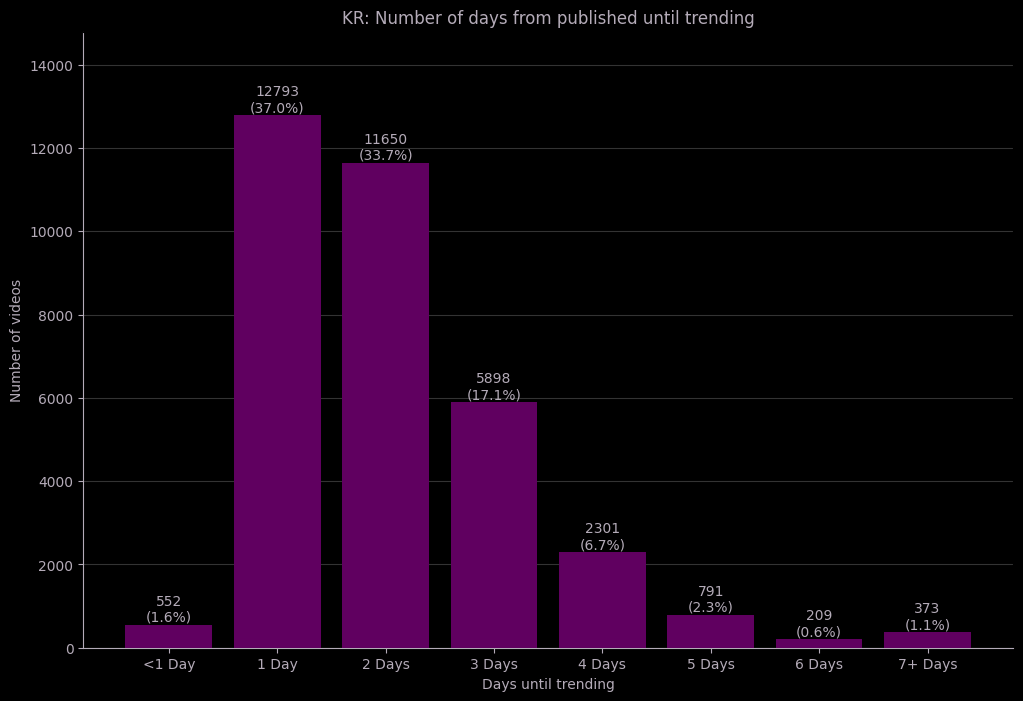

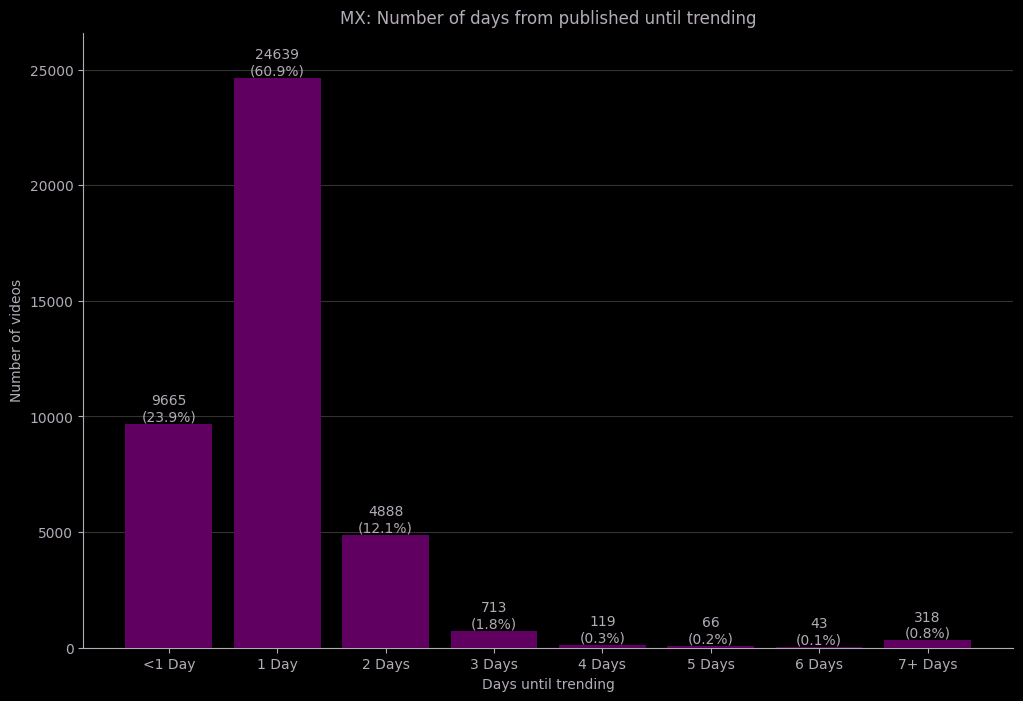

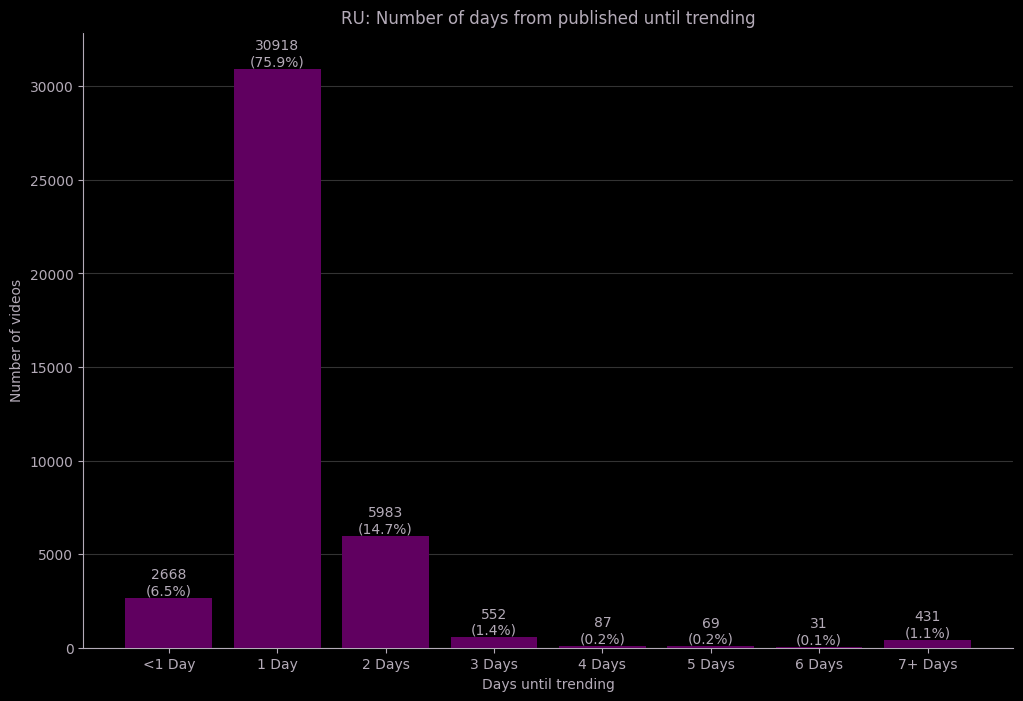

In [15]:
#column_data = sorted_DE_videos_for_histogram['trending_time_in_seconds']/86400 #seconds in a day
column_data = CA_videos['days_til_trend']

# Define custom bin edges
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]

# bin_edges = [0, 86400, 172800, 259200, 345600, 432000, 518400, 604800, float('inf')]
# Define labels for the bins
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']

# Create the 'duration_category' column
# histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)

# Count the values in each category
category_counts = histogram_data.value_counts().sort_index()

# Calculate the total count
total_count = category_counts.sum()

# Set the figure size for the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Adjust the width (10) and height (6) as needed
# Create a bar graph with increased spacing between bars
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []

# Annotate the count and percentage values above the bars
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
    
# Increase space above the top bar
plt.ylim(0, max(category_counts) + 2000)

# setting label names and colours
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')

#setting x/y axis line colour
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)

#adjusting horizontal lines so that they are underneath bars
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)

#set title name and colour
ax.set_title('CA: Number of days from published until trending')

#set background colour 
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)

plt.show()


column_data = DE_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('DE: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = FR_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('FR: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = GB_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('GB: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = IN_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('IN: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = US_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('US: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = JP_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('JP: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = KR_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('KR: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = MX_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('MX: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()


column_data = RU_videos['days_til_trend']
bin_edges = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
bin_labels = ['<1 Day','1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7+ Days']
histogram_data = pd.cut(column_data, bins=bin_edges, labels=bin_labels, right=False)
category_counts = histogram_data.value_counts().sort_index()
total_count = category_counts.sum()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(category_counts.index, category_counts, width=0.8,zorder=3,color=colour_gradient_medium_purple)  # Adjust the width (0.8) for spacing
category_percentage = []
for i, count in enumerate(category_counts):
    percentage = (count / total_count) * 100
    category_percentage.append(percentage)
    label = f"{count}\n({percentage:.1f}%)"
    ax.text(i, count + 10, label, ha='center', va='bottom')
plt.ylim(0, max(category_counts) + 2000)
ax.set_xlabel('Days until trending')
ax.set_ylabel('Number of videos')
ax.spines['left'].set_color(colour_off_white)
ax.spines['bottom'].set_color(colour_off_white)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=colour_accent_soft_black)
ax.set_title('RU: Number of days from published until trending')
ax.set_facecolor(colour_primary_black)
fig.set_facecolor(colour_primary_black)
plt.show()

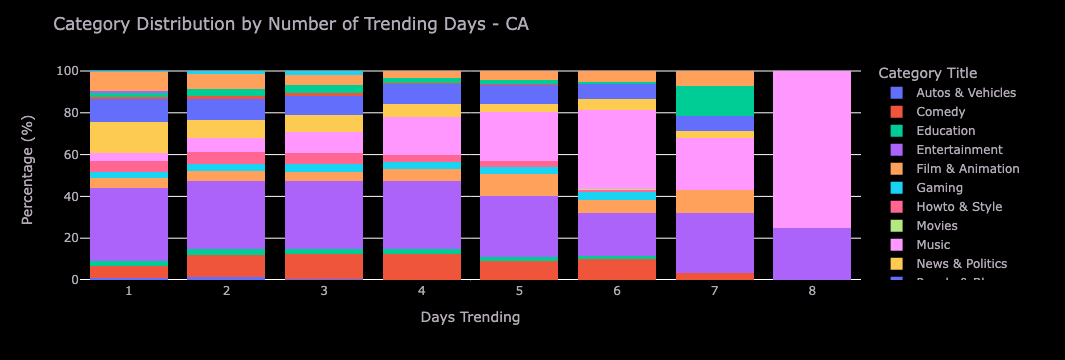

In [84]:
###using category titles from json

# manually open and read the JSON file
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/CA_category_id.json', 'r') as json_file:
    CA_category_id = json.load(json_file)

json_df = pd.DataFrame(CA_category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')

# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
CA_videos = CA_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
CA_videos = CA_videos.drop(columns=['id'])

repeat_vids = CA_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
# repeat_vids = DE_videos.groupby(['video_id']).size().reset_index(name='days d')

repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})

repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)

repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100

# Melt the dataframe for plotly
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

# Plotting with plotly
fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
            #  title='Category Distribution by Number of Trending Days',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])

fig.update_traces(marker=dict(line=dict(width=0)))
# Add titles and labels

fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - CA',
    title_font_color = colour_off_white,
    
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

fig.show()

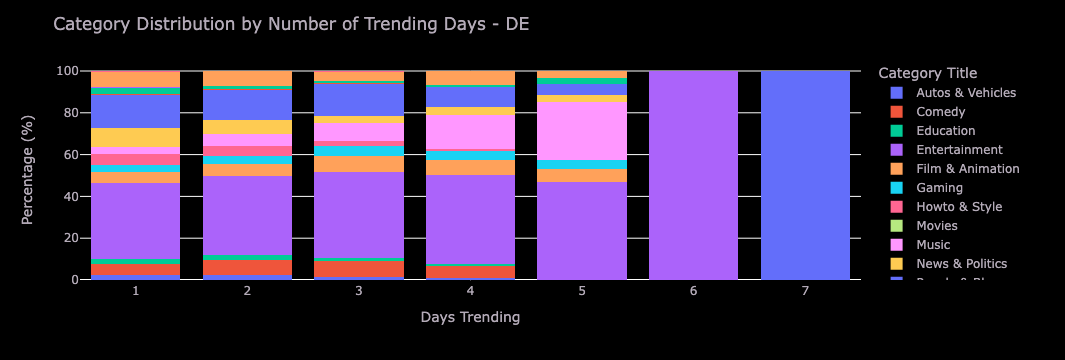

In [4]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/DE_category_id.json', 'r') as json_file:
    DE_category_id = json.load(json_file)
json_df = pd.DataFrame(DE_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
DE_videos = DE_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
DE_videos = DE_videos.drop(columns=['id'])


repeat_vids = DE_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - DE',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

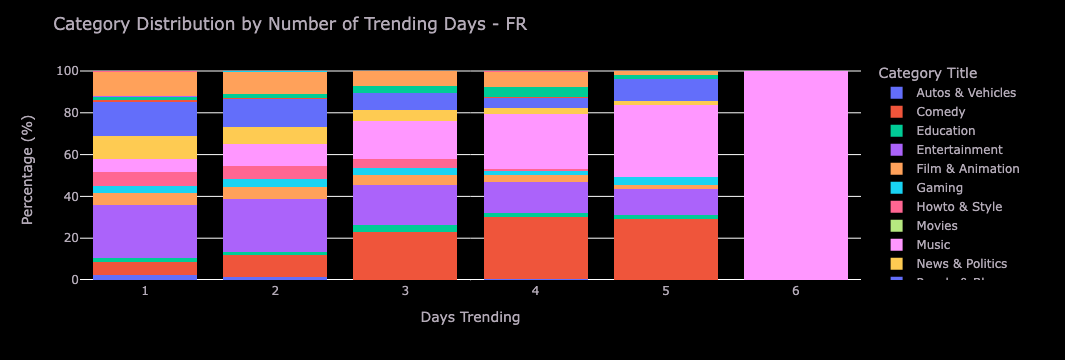

In [86]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/FR_category_id.json', 'r') as json_file:
    FR_category_id = json.load(json_file)
json_df = pd.DataFrame(FR_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
FR_videos = FR_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
FR_videos = FR_videos.drop(columns=['id'])

repeat_vids = FR_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - FR',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

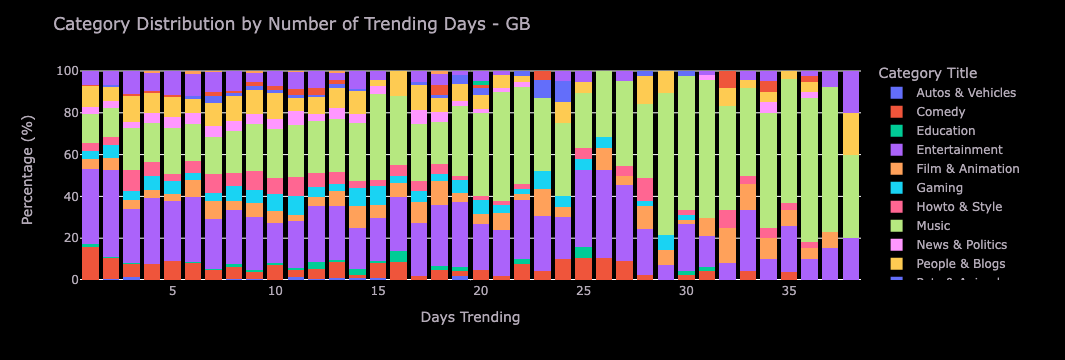

In [6]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/GB_category_id.json', 'r') as json_file:
    GB_category_id = json.load(json_file)
json_df = pd.DataFrame(GB_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
GB_videos = GB_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
GB_videos = GB_videos.drop(columns=['id'])


repeat_vids = GB_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - GB',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

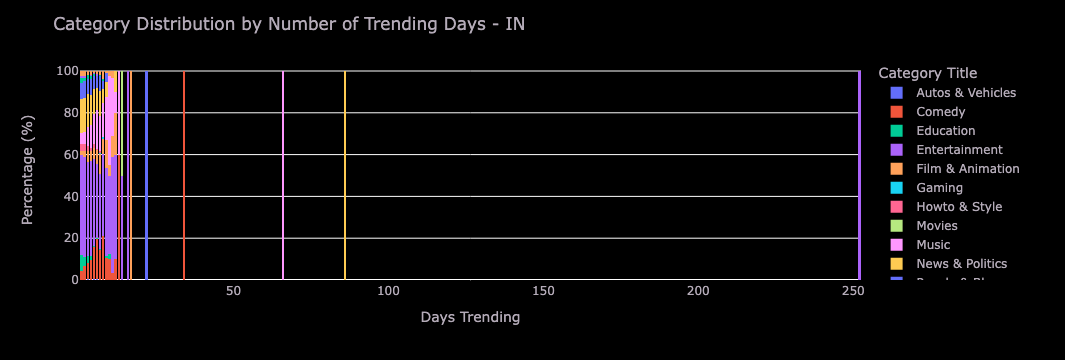

In [90]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/IN_category_id.json', 'r') as json_file:
    IN_category_id = json.load(json_file)
json_df = pd.DataFrame(IN_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
IN_videos = IN_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
IN_videos = IN_videos.drop(columns=['id'])


repeat_vids = IN_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - IN',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

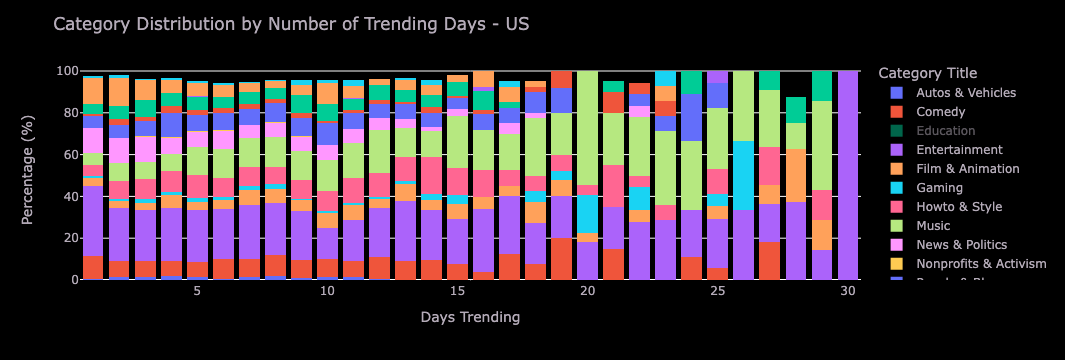

In [92]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/US_category_id.json', 'r') as json_file:
    US_category_id = json.load(json_file)
json_df = pd.DataFrame(US_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
US_videos = US_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
US_videos = US_videos.drop(columns=['id'])


repeat_vids = US_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - US',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

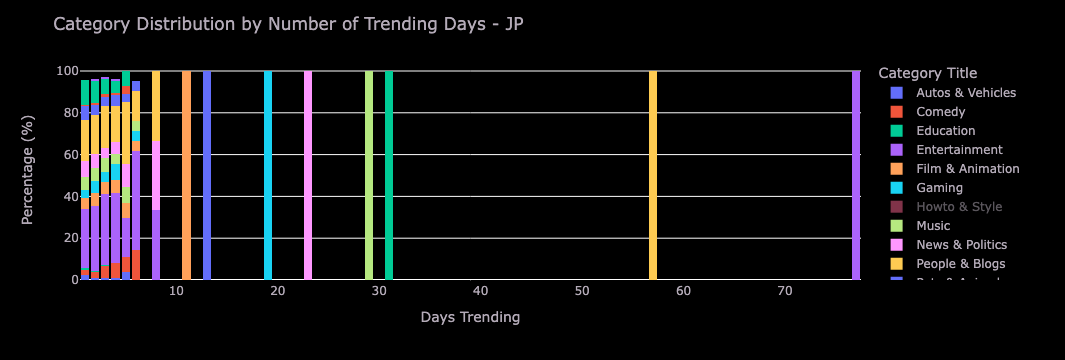

In [18]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/JP_category_id.json', 'r') as json_file:
    JP_category_id = json.load(json_file)
json_df = pd.DataFrame(JP_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
JP_videos = JP_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
JP_videos = JP_videos.drop(columns=['id'])


repeat_vids = JP_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - JP',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

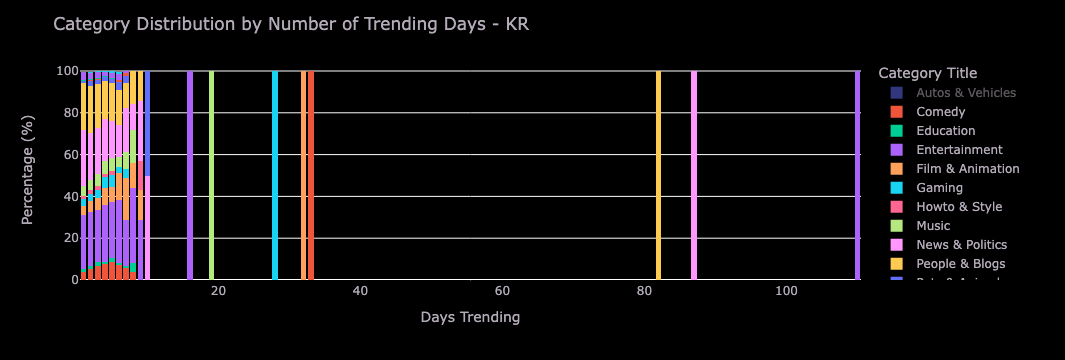

In [21]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/KR_category_id.json', 'r') as json_file:
    KR_category_id = json.load(json_file)
json_df = pd.DataFrame(KR_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
KR_videos = KR_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
KR_videos = KR_videos.drop(columns=['id'])


repeat_vids = KR_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - KR',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

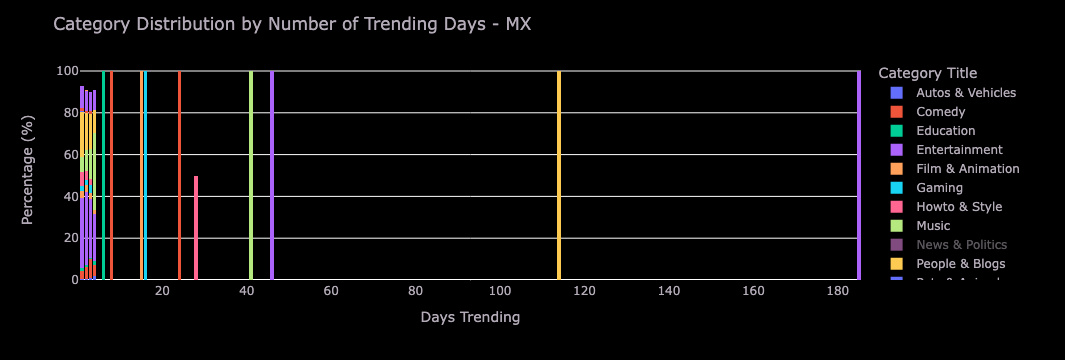

In [25]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/MX_category_id.json', 'r') as json_file:
    MX_category_id = json.load(json_file)
json_df = pd.DataFrame(MX_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
MX_videos = MX_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
MX_videos = MX_videos.drop(columns=['id'])


repeat_vids = MX_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - MX',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

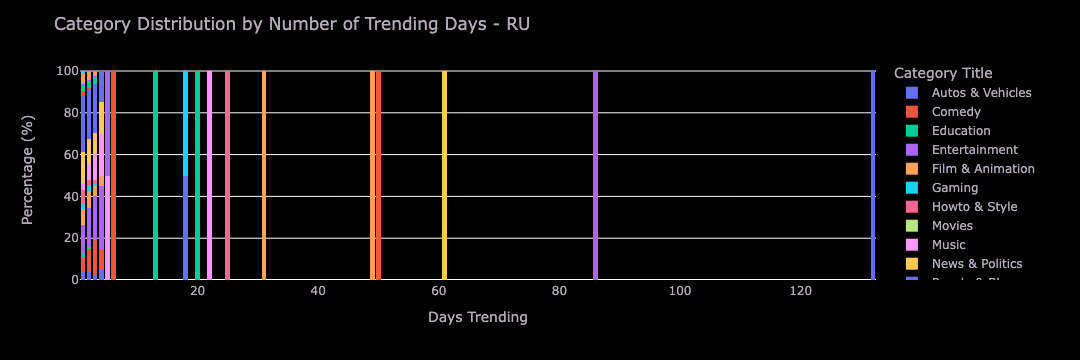

In [26]:
with open('Academic/Fall_2023/CMPT732/Project/Dataset/2017-2018/RU_category_id.json', 'r') as json_file:
    RU_category_id = json.load(json_file)
json_df = pd.DataFrame(RU_category_id['items'])
json_df['id'] = json_df['id'].astype('int64')
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])
RU_videos = RU_videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')
RU_videos = RU_videos.drop(columns=['id'])


repeat_vids = RU_videos.groupby(['video_id'])['category_title'].value_counts().reset_index(name='Days Trending')
repeat_vids = repeat_vids.rename(columns={'category_title':'Category Title'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Days Trending', columns='Category Title', values='video_id', aggfunc='count').fillna(0)
repeat_vids_percentage = repeat_vids_pivot_data.divide(repeat_vids_pivot_data.sum(axis=1),axis=0) * 100
df_melted = repeat_vids_percentage.reset_index().melt(id_vars='Days Trending', value_name='percentage')

fig = px.bar(df_melted, x='Days Trending', y='percentage', color='Category Title',
             labels={'count': 'Number of Trending Days', 'percentage': 'Percentage (%)'},
             hover_data=['Category Title', 'percentage'])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Category Distribution by Number of Trending Days - RU',
    title_font_color = colour_off_white,
    # xaxis_title='Month-Year',
    xaxis_title_font_color = colour_off_white,
    xaxis=dict(linecolor=colour_primary_black),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)
fig.show()

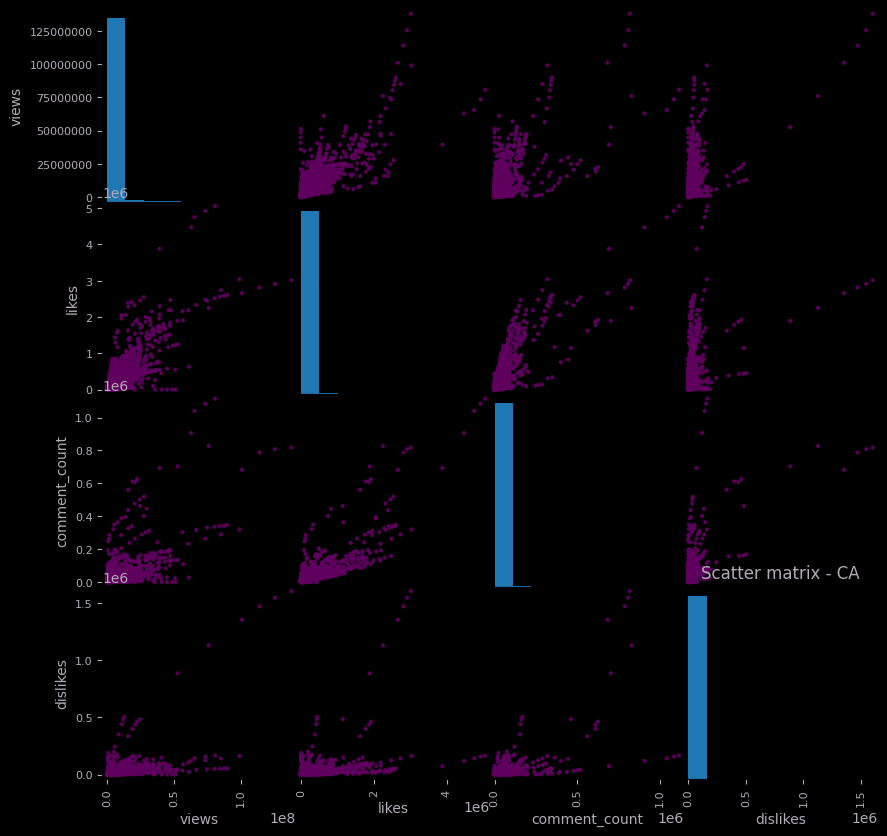

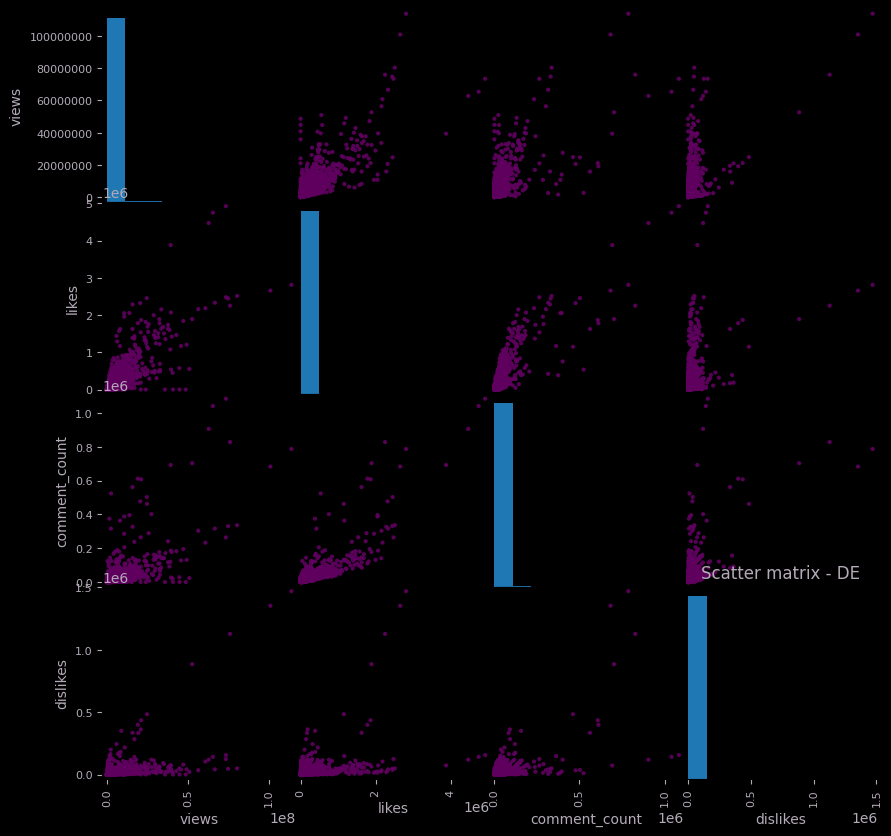

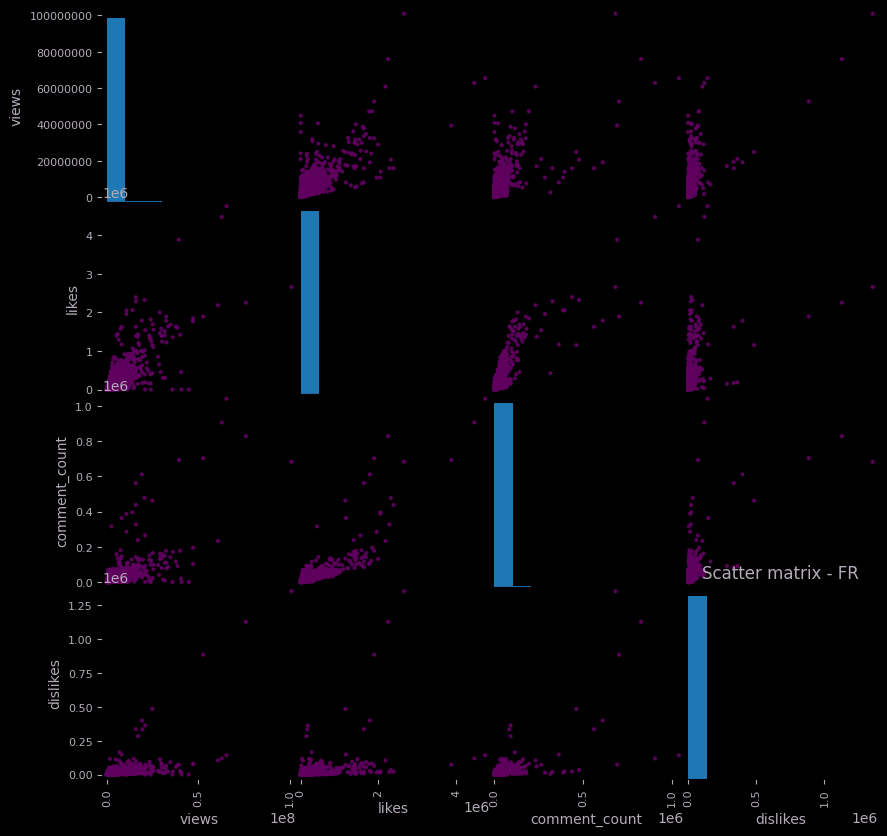

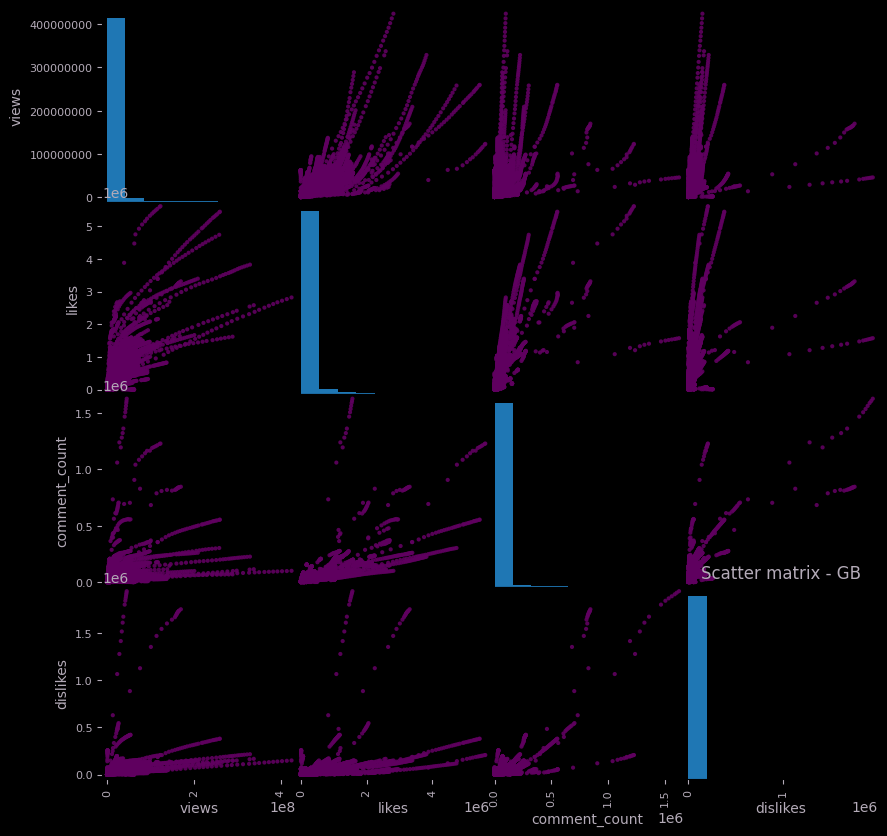

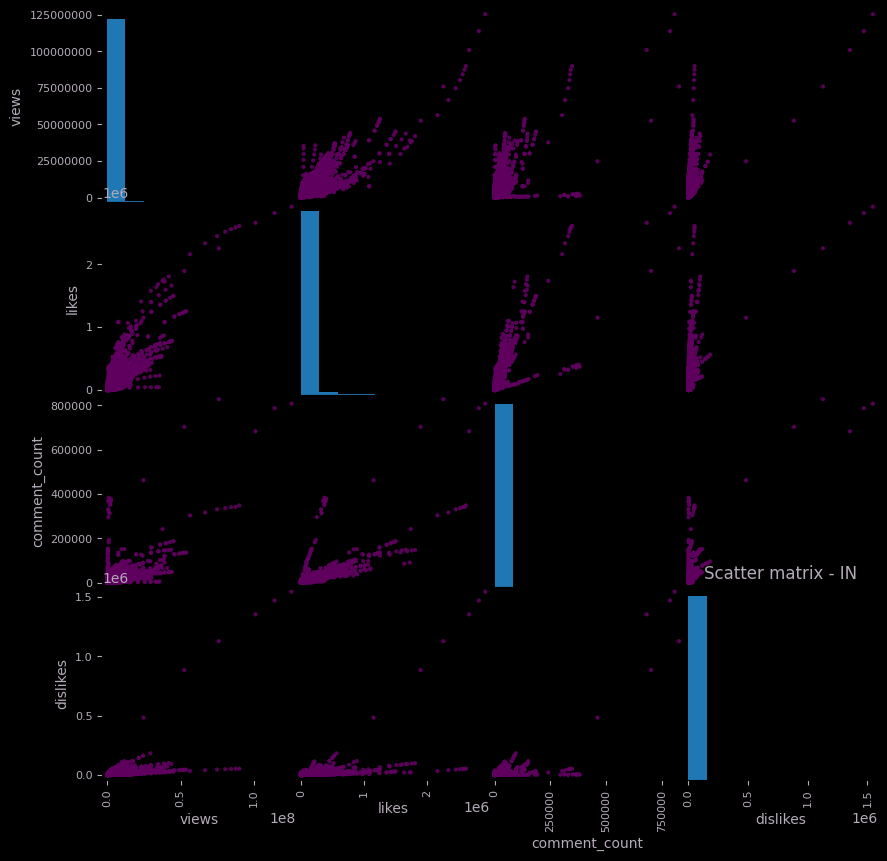

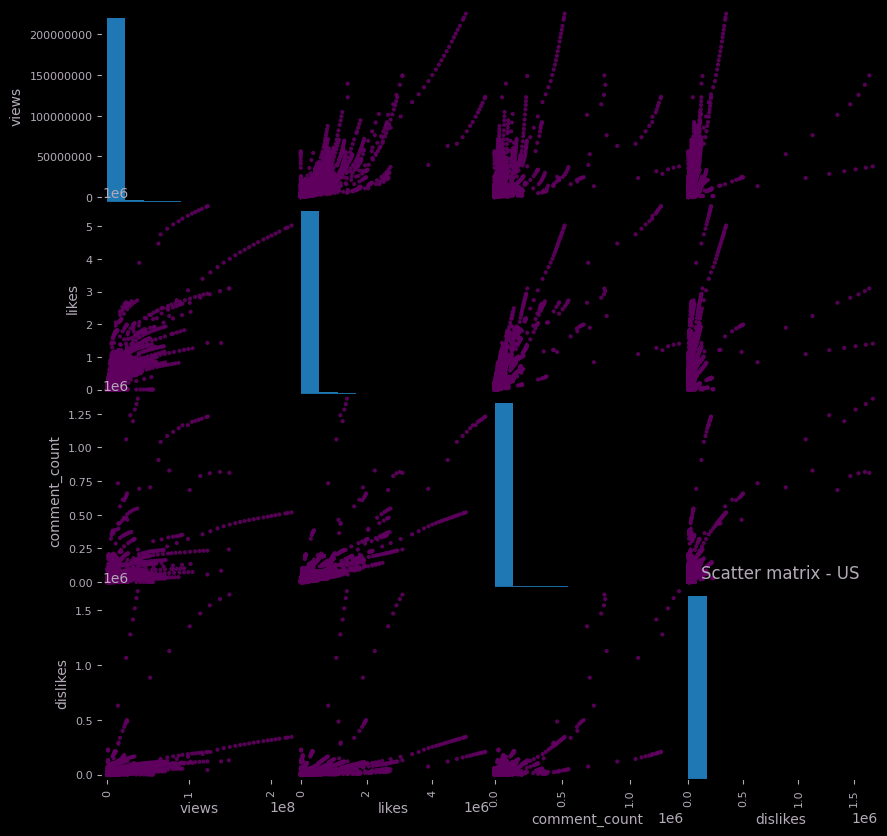

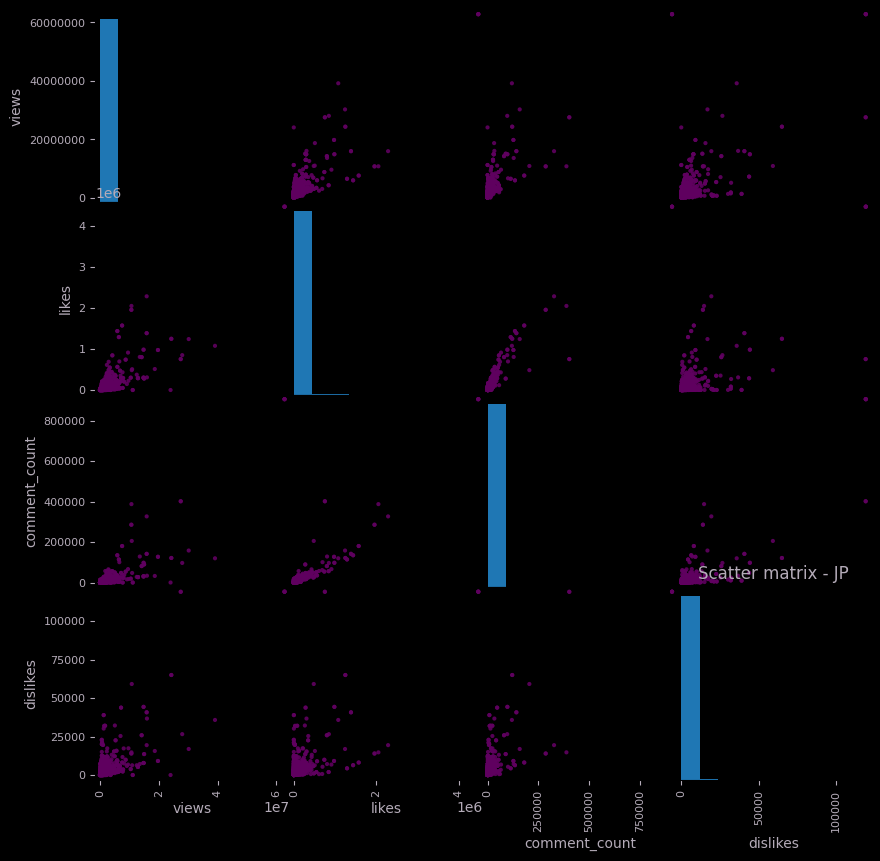

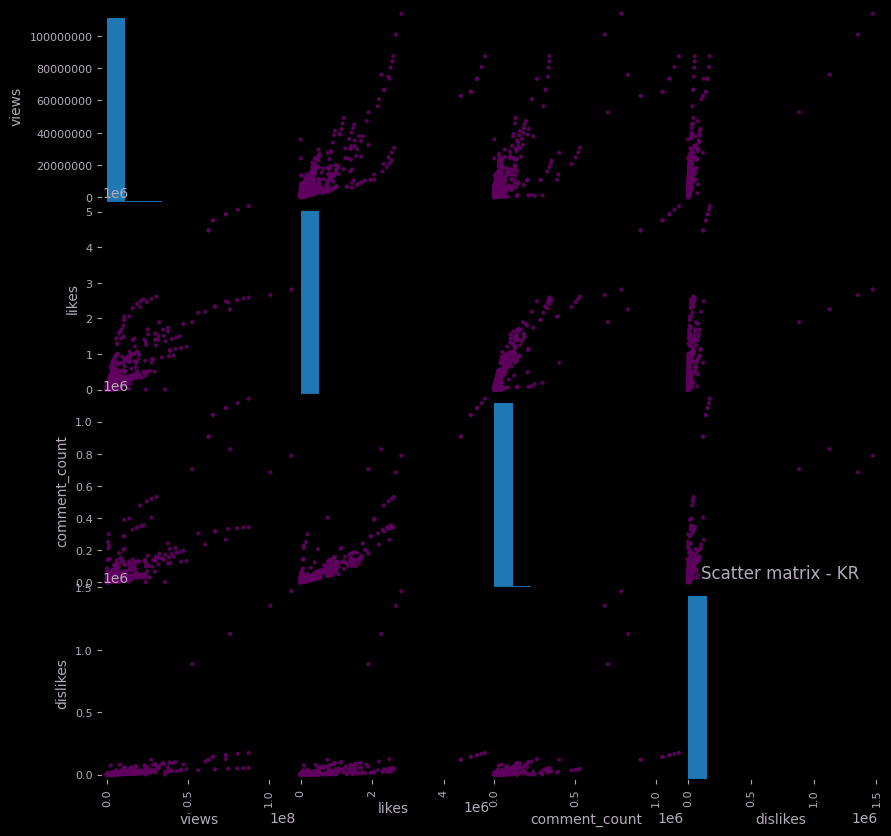

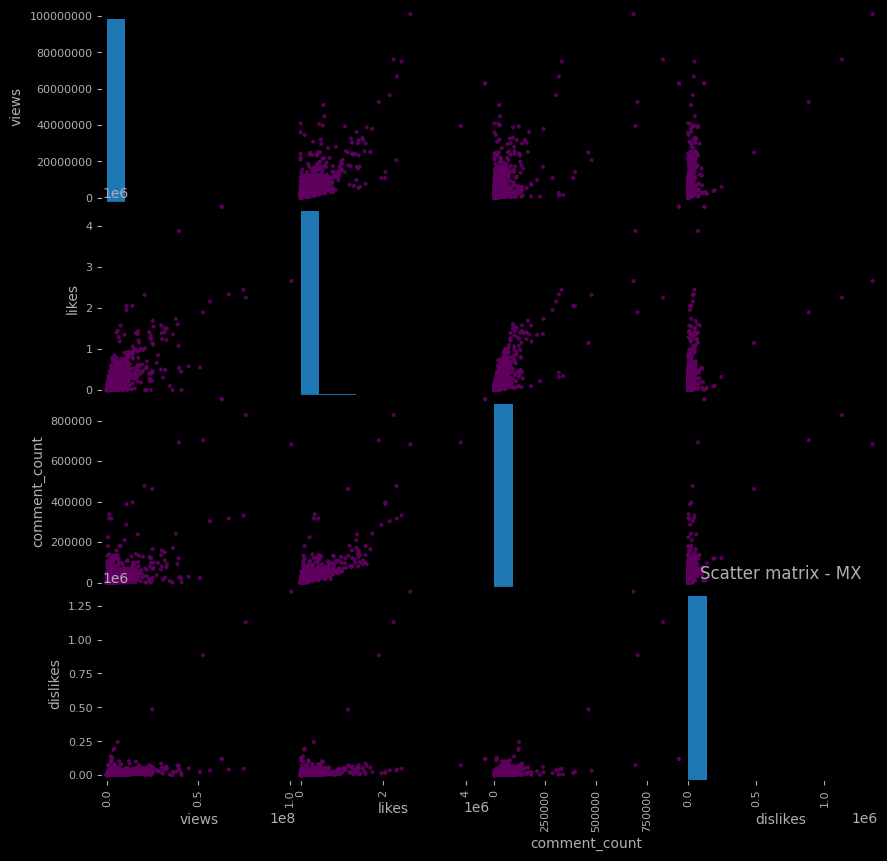

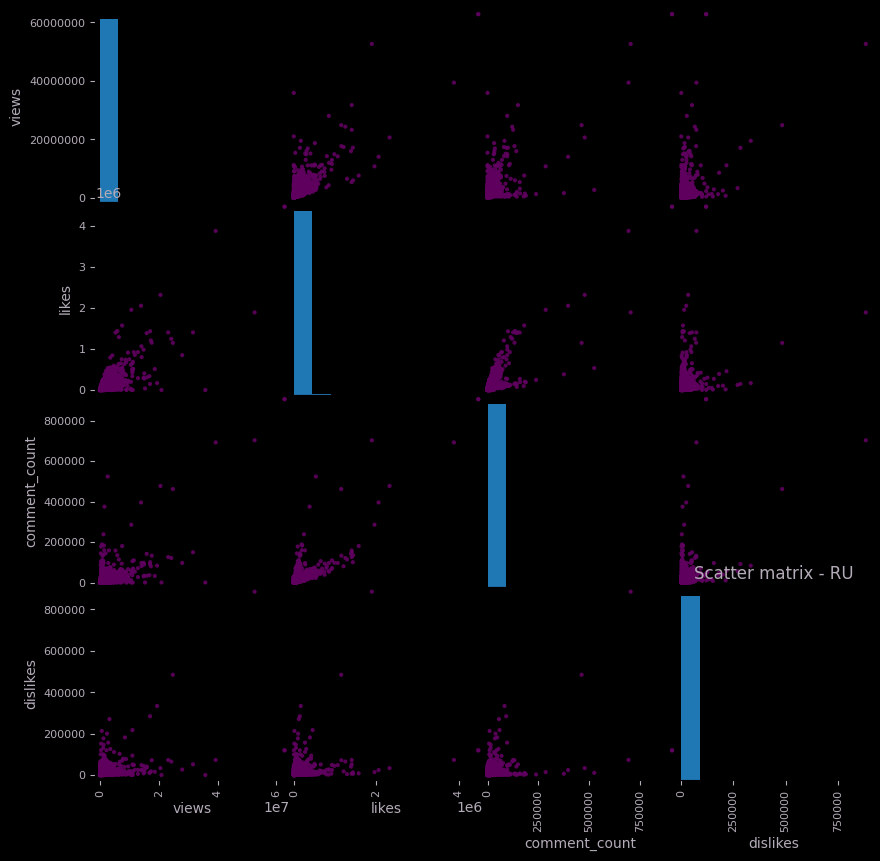

In [27]:
axes = pd.plotting.scatter_matrix(CA_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - CA")
plt.show()


axes = pd.plotting.scatter_matrix(DE_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - DE")
plt.show()


axes = pd.plotting.scatter_matrix(FR_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - FR")
plt.show()


axes = pd.plotting.scatter_matrix(GB_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - GB")
plt.show()


axes = pd.plotting.scatter_matrix(IN_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - IN")
plt.show()


axes = pd.plotting.scatter_matrix(US_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - US")
plt.show()


axes = pd.plotting.scatter_matrix(JP_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - JP")
plt.show()


axes = pd.plotting.scatter_matrix(KR_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - KR")
plt.show()


axes = pd.plotting.scatter_matrix(MX_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - MX")
plt.show()


axes = pd.plotting.scatter_matrix(RU_videos[['views','likes','comment_count','dislikes']],
                           figsize=(10,10),
                           diagonal='hist',
                           color=colour_gradient_medium_purple,
                           alpha=0.9)
plt.title("Scatter matrix - RU")
plt.show()